In [1]:
!git clone https://github.com/AyAchi-19/ML-hand-image-detection-.git



Cloning into 'ML-hand-image-detection-'...


In [2]:
pip install mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 8.2 MB/s eta 0:00:00


# the main code for hand image ditection


In [3]:
import os
import cv2
import mediapipe as mp
import kagglehub

# Function to detect hands using MediaPipe
def detect_hands(image, static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5):
    mp_hands = mp.solutions.hands
    with mp_hands.Hands(
        static_image_mode=static_image_mode,
        max_num_hands=max_num_hands,
        min_detection_confidence=min_detection_confidence
    ) as hands:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)
        annotated_image = image.copy()
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        return results, annotated_image

# Function to process hand landmarks
def process_hand_landmarks(hand_landmarks, mp_hands):
    landmark_data = {}
    for landmark_index, landmark in enumerate(hand_landmarks.landmark):
        landmark_data[mp_hands.HandLandmark(landmark_index).name] = (
            landmark.x, landmark.y, landmark.z
        )
    return landmark_data

# Download and prepare dataset
dataset_path = "/root/.cache/kagglehub/datasets/shyambhu/hands-and-palm-images-dataset/versions/2"
print(f"Dataset path: {dataset_path}")

# Check dataset directory
if not os.path.exists(dataset_path):
    print("Dataset path does not exist. Please verify the Kaggle dataset download.")
    exit()

print("Files in dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))

# Image processing loop
mp_hands = mp.solutions.hands
for root, _, files in os.walk(dataset_path):
    for filename in files:
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, filename)
            image = cv2.imread(image_path)

            if image is None:
                print(f"Error: Could not read image: {filename}")
                continue

            # Detect hands in the image
            results, annotated_image = detect_hands(image)

            # Display the annotated image
            cv2.imshow(f"Hand Detection - {filename}", annotated_image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

            # Save the annotated image
            output_filename = f"annotated_{filename}"
            output_dir = os.path.join(dataset_path, "annotated")
            os.makedirs(output_dir, exist_ok=True)
            output_path = os.path.join(output_dir, output_filename)
            cv2.imwrite(output_path, annotated_image)

            # Process and display hand landmarks if detected
            if results.multi_hand_landmarks:
                for i, hand_landmarks in enumerate(results.multi_hand_landmarks):
                    handedness_label = results.multi_handedness[i].classification[0].label.lower()
                    print(f"Hand {i + 1} Handedness: {handedness_label}")

                    # Extract landmark data
                    landmark_info = process_hand_landmarks(hand_landmarks, mp_hands)

                    # Example: Print index finger tip coordinates
                    index_tip = landmark_info['INDEX_FINGER_TIP']
                    print(f"Hand {i + 1}: Index finger tip x = {index_tip[0]}, y = {index_tip[1]}, z = {index_tip[2]}")

                    # Calculate distance between wrist and pinky MCP
                    wrist_x, wrist_y = landmark_info['WRIST'][:2]
                    pinkie_mcp_x, pinkie_mcp_y = landmark_info['PINKY_MCP'][:2]
                    distance = ((wrist_x - pinkie_mcp_x)**2 + (wrist_y - pinkie_mcp_y)**2)**0.5
                    print(f"Hand {i + 1} Distance between wrist and pinkie MCP: {distance}")


Dataset path: /root/.cache/kagglehub/datasets/shyambhu/hands-and-palm-images-dataset/versions/2
Dataset path does not exist. Please verify the Kaggle dataset download.
Files in dataset directory:


add image of a hand

In [1]:
from google.colab import files

# Upload the image file

uploaded = files.upload()

# The image path will be the filename after uploading
image_path = "handtest.jpg"


Saving handtest.jpg to handtest.jpg


In [2]:
pip install  mediapipe

Hand detected with confidence: 70.37%


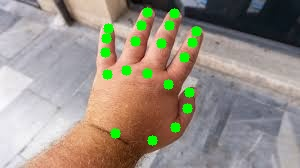

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import cv2
import mediapipe as mp
from IPython.display import Image, display
import numpy as np

# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

def calculate_confidence(hand_landmarks, image_shape):
    """
    Calculate a confidence score based on the distance of landmarks from expected positions.
    A simple approach is to calculate the Euclidean distance of landmarks.
    """
    confidence = 0
    h, w, _ = image_shape
    for idx, landmark in enumerate(hand_landmarks.landmark):
        # Convert the normalized landmark (x, y) to pixel coordinates
        x, y = int(landmark.x * w), int(landmark.y * h)

        # Calculate distance from the center of the image (simple heuristic for confidence)
        distance = np.sqrt((x - w / 2)**2 + (y - h / 2)**2)

        # Normalize the distance and subtract from a perfect confidence (100%)
        confidence += max(0, 100 - (distance / np.sqrt((w / 2)**2 + (h / 2)**2) * 100))

    # Return the average confidence for all landmarks
    return confidence / len(hand_landmarks.landmark)

def detect_hands(image):
    # Convert image to RGB for MediaPipe
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform hand detection
    result = hands.process(rgb_image)

    # Annotate the image with the detected hands
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Calculate confidence for this hand
            confidence = calculate_confidence(hand_landmarks, image.shape)
            print(f"Hand detected with confidence: {confidence:.2f}%")

            # Annotate the landmarks on the image
            for idx, landmark in enumerate(hand_landmarks.landmark):
                h, w, _ = image.shape
                cx, cy = int(landmark.x * w), int(landmark.y * h)
                cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

    else:
        print("No hands detected.")

    return result, image

# Specify the image path
image_path = "handtest.jpg" #add your hand image path

# Read the uploaded image
image = cv2.imread(image_path)

# Check if the image was read correctly
if image is None:
    print("Error: Could not read the image. Please check the filename or path.")
else:
    # Detect hands on the uploaded image
    results, annotated_image = detect_hands(image)

    # Save the annotated image
    output_path = f"annotated_{image_path}"
    cv2.imwrite(output_path, annotated_image)

    # Display the annotated image in Jupyter
    display(Image(output_path))

    # Optional: Download the annotated image
    from google.colab import files
    files.download(output_path)


# New Section